<a href="https://colab.research.google.com/github/Aru0504/SparksFoundation/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Arundhuti Paul.
# Topic: # Prediction using Supervised ML.

Importing libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import plotly.express as px

Importing Datasets

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Summary Statistics

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualisation of the Relationship

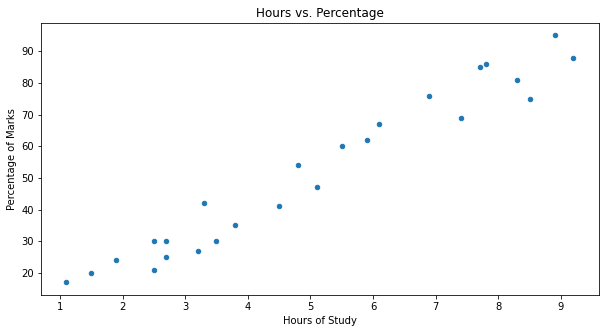

In [4]:
data.plot.scatter(x= 'Hours',y='Scores', figsize = (10,5))
plt.xlabel('Hours of Study')
plt.ylabel('Percentage of Marks')
plt.title('Hours vs. Percentage')
plt.show()

In [5]:
#Interactive Scatterplot
px.scatter(data, 'Hours','Scores')

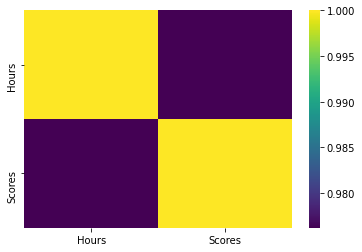

In [6]:
# Correlation Matrix

sns.heatmap(data.corr(),cmap= 'viridis')

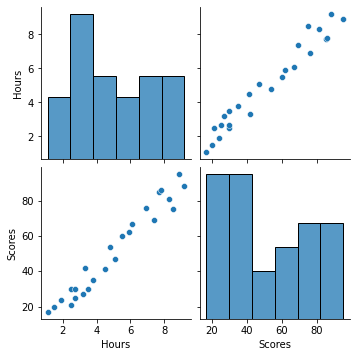

In [7]:
# Pairplot
sns.pairplot(data)

**From the plot, it is clear that there exists a linear relationship between hours and scores, and possess a very high positive correlation.**

## Data Preprocessing

In [8]:
X = data[['Hours']]
Y = data[['Scores']]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20)

## Simple Linear Regression 

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
coeff = regressor.coef_
print("Slope Coefficient:",coeff)
Intcpt = regressor.intercept_
print("Intercept:",Intcpt)

Slope Coefficient: [[9.40973103]]
Intercept: [3.46002604]


The equation of the best fitted line is Y = 3.46 + 9.41 X

In [12]:
y_pred = regressor.predict(X_test)

## Plotting Regression Line

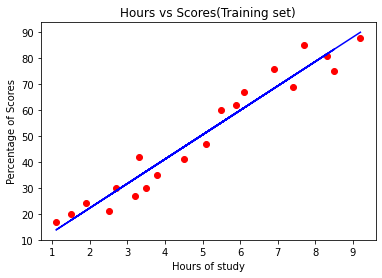

In [13]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Scores(Training set)')
plt.xlabel('Hours of study')
plt.ylabel('Percentage of Scores')
plt.show()

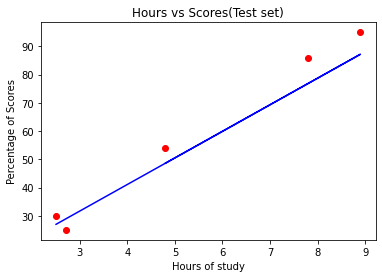

In [14]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Hours vs Scores(Test set)')
plt.xlabel('Hours of study')
plt.ylabel('Percentage of Scores')
plt.show()

## Prediction

In [15]:
X_test

,Hours
16,2.5
9,2.7
15,8.9
24,7.8
21,4.8


In [18]:
# Comparing Actual vs Predicted
X_test = X_test.reset_index(drop= True)
y_test = y_test.reset_index(drop= True)
df = pd.DataFrame(X_test)
df['Actual']= y_test 
df['Predicted']= y_pred  
df 

,Hours,Actual,Predicted
0,2.5,30,26.984354
1,2.7,25,28.866300
2,8.9,95,87.206632
3,7.8,86,76.855928
4,4.8,54,48.626735


In [22]:
# Predicting the scores of a student who studies for 9.25 hours
Hours = 9.25
Hours = np.array(Hours).reshape(-1,1)
regressor.predict(Hours)

array([[90.50003804]])

**Hence, the predicted marks of the student who studies for 9.25 Hours/day is 90.5%**